In [6]:
import networkx as nx

from games import JOBST_GAME
from monte_carlo import combined_strategies
from network import SatisfiaMaximiserNetwork
from network.neighbourhood import NetworkByNeighborhood

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing the impact of the initial localization of SatisfIA agents on a neighborhood

## Objective
> We want to compare the trajectories of a popuplation of SatisfIA between the two following conditions:
> 1) Random assignment
> 2) Assignment to a neighborhood: we pick a starting node at random, assign it as SatisfIA, and then assign all SatisfIA agents to its neighbours, and expand the neighbourhood progressively

## Hypothesis
We expect that SatisfIA agents will have increased survival rate when they start in the same neighborhood

## Experiment

In [8]:
N_AGENTS = 50
EDGES_PER_NODE = 2

SATISFIA_SHARE = 0.4
N_GENERATIONS = 1000

P_PLAY_GAME = 1
P_SOCIAL_LEARNING = 1

SEED = 1

barabasi_graph = nx.barabasi_albert_graph(n=N_AGENTS, m=EDGES_PER_NODE, seed=SEED)

### 1) Random assignment

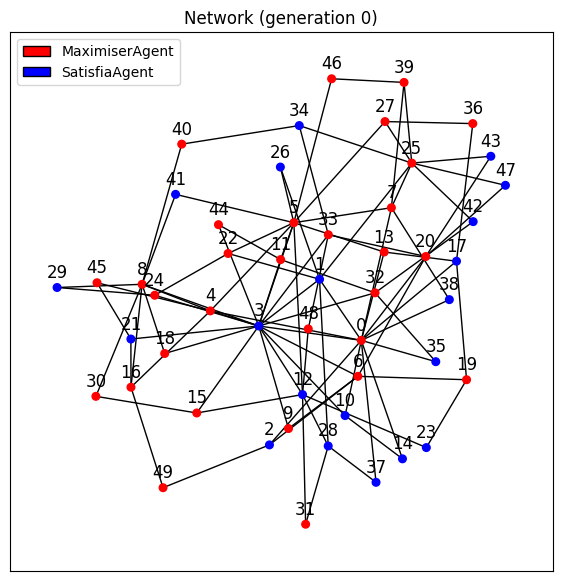

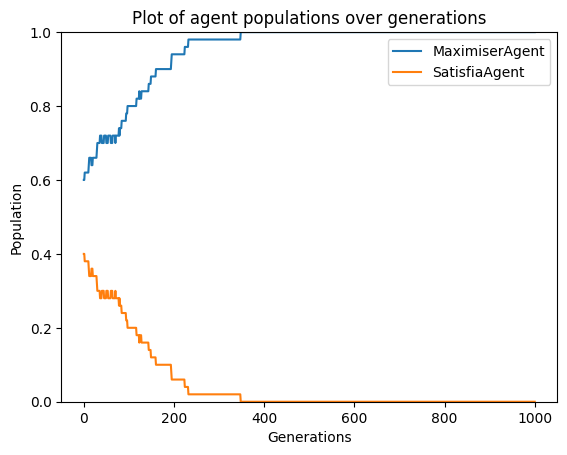

In [9]:
simulator = SatisfiaMaximiserNetwork(JOBST_GAME, combined_strategies,
                                     satisfia_share=SATISFIA_SHARE,
                                     generations=N_GENERATIONS,
                                     base_graph=barabasi_graph, 
                                     draw_network_interval=N_GENERATIONS // 5)
simulator.draw_network(0)
simulator.iterate_generations(P_PLAY_GAME, P_SOCIAL_LEARNING, plot=True)

### Assignment by neighbourhood

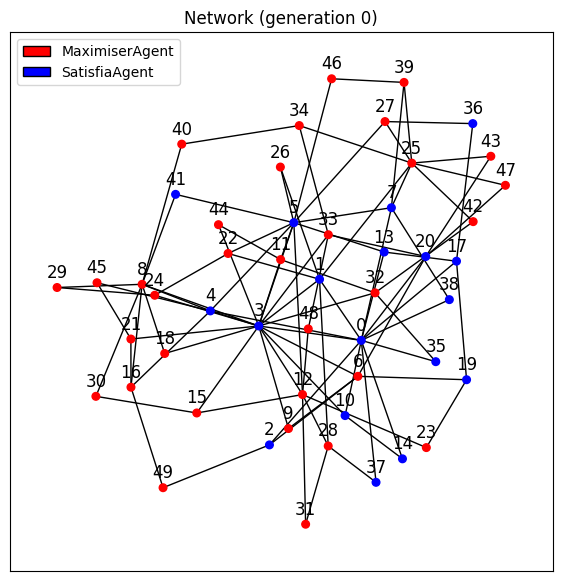

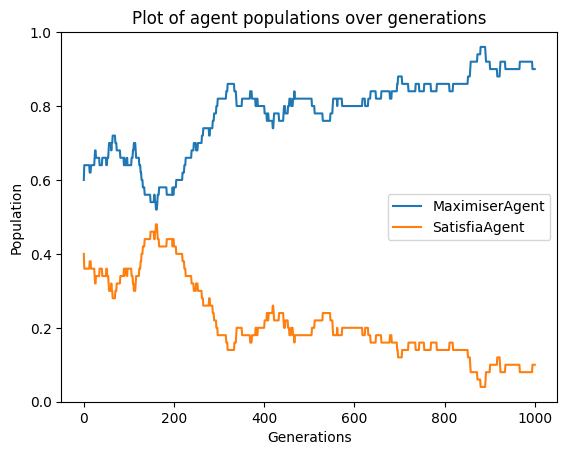

In [10]:
simulator = NetworkByNeighborhood(JOBST_GAME, combined_strategies,
                                     satisfia_share=SATISFIA_SHARE,
                                     generations=N_GENERATIONS,
                                     base_graph=barabasi_graph, 
                                     draw_network_interval=N_GENERATIONS // 5)
simulator.draw_network(0)
simulator.iterate_generations(P_PLAY_GAME, P_SOCIAL_LEARNING, plot=True)

## Conclusion

Neighborhood assignment considerably reduces the speed of extinction, but doesn't seem to prevent it.